<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

// needed to generate the Table of contents 
// taken from github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>

# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
#load python packages
import os
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
os.chdir("../") 
print(os.getcwd())

/home/andrea/Dropbox/PyProjects/Springboard/Ski_Resort


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [4]:
#initialize dict to collect model performance data
models_performance = {'Model': [],
        'Explained Variance': [],
        'Mean Absolute Error': [],
        'Features Dropped': [],
        }

In [5]:
#Loading data
filename = 'data/interim/step3_output.csv'

df = pd.read_csv(filename, index_col=0)

In [6]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# I # dropping 'Name', 'state' because they are irrelevant to the prediction
# dropping 'AdultWeekend' beacuse it's my response variable
var_to_exclude = ['Name', 'state']

# Declare an explanatory variable, called X
# dropping 'AdultWeekend' beacuse it's my response variable
X = df.drop(var_to_exclude + ['AdultWeekend'], axis=1)
print(type(X))

# Declare a response variable, called y, 
# Assign it the AdultWeekend column of the df 

y = df.loc[:,'AdultWeekend'] 
print(type(y))

# Use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [8]:
#all model 2 set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model2 = lm.fit(X_train,y_train)

In [9]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model2.predict(X_test)

In [10]:
print('Explained Variance : ', explained_variance_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('Intercept : ', lm.intercept_)

#Add Values to dict
models_performance['Model'].append('Model 2')
models_performance['Explained Variance'].append(explained_variance_score(y_test, y_pred))
models_performance['Mean Absolute Error'].append(mean_absolute_error(y_test, y_pred))
models_performance['Features Dropped'].append(var_to_exclude)

Explained Variance :  0.6173858044944314
MAE :  7.002704792077622
Intercept :  56.89781265626314


In [11]:
#print(models_comparison)

In [12]:
# DataFrame displaying the coefficients for each state
M2_coefficients_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

# Print the top 10 coefficient values in descending order
M2_coefficients_df.sort_values(by='Coefficient', ascending=False).head(10)

,Coefficient
AdultWeekday,9.792263
vertical_drop,3.424301
clusters,3.214312
averageSnowfall,2.359921
summit_elev,2.201206
daysOpenLastYear,1.995920
SkiableTerrain_ac,1.873452
quad,1.552902
triple,1.460332
projectedDaysOpen,1.369666


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [13]:
my_resort = df[df['Name'].str.contains('Whitefish Mountain')]

In [14]:
my_resort.T

,151
Name,Whitefish Mountain Resort
state,Montana
summit_elev,6817
vertical_drop,2353
trams,0
fastEight,0
fastSixes,0
fastQuads,3
quad,2
triple,6


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [15]:
X_my_resort = my_resort.drop(var_to_exclude + ['AdultWeekend'], axis=1)

In [16]:
# Let's create a dataframe with the new number of chairs
X_my_resort_new = X_my_resort.copy()

# Update data with new chair lift information
# we don't know which chair are we taling about it could be any of these
# ['fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple','double']
new_chair = 'quad' #let's assume it's the biggest fastes chair...

X_my_resort_new['total_chairs'] = X_my_resort_new['total_chairs'] + 1
X_my_resort_new[new_chair] = X_my_resort_new[new_chair] + 1

In [17]:
y_current = my_resort.loc[:,'AdultWeekend'].values

In [18]:
#Scaling Current Values
# Use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
#scaler_my_resort = preprocessing.StandardScaler().fit(X_my_resort)

# Scaling values
X_my_resort_scaled = scaler.transform(X_my_resort)

In [19]:
#Scaling New Values
# Use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
#scaler_my_resort_new = preprocessing.StandardScaler().fit(X_my_resort_new)

# Scaling values
X_my_resort_scaled_new = scaler.transform(X_my_resort_new)


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [20]:
y_my_resort_pred = model2.predict(X_my_resort_scaled)
y_my_resort_new_pred = model2.predict(X_my_resort_scaled_new)

In [21]:
print('Current Expected Market Price :', y_my_resort_pred )
print('New Expected Market Price :', y_my_resort_new_pred )

Current Expected Market Price : [82.78520435]
New Expected Market Price : [85.32059631]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [22]:
print('Current Ticket Price :', y_current)

Current Ticket Price : [81.]


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

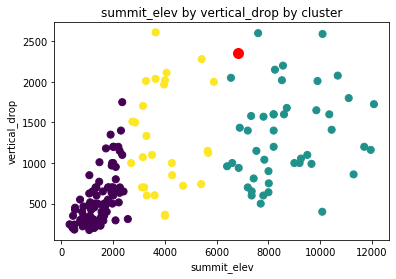

In [23]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(my_resort['summit_elev'], my_resort['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('reports/figures/fig1.png',bbox_inches='tight')

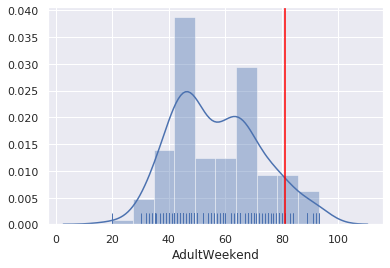

In [24]:
# Histogram and KDE for AdultWeekend

import seaborn as sns
sns.set()
ax = sns.distplot(df['AdultWeekend'], rug=True, )
plt.axvline(y_current, 0, 1, color = 'red')
plt.savefig('reports/figures/fig2.png',bbox_inches='tight')

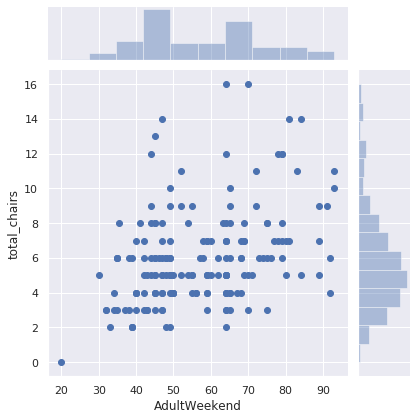

In [25]:
sns.jointplot(x="AdultWeekend", y="total_chairs", data=df.loc[:,['AdultWeekend', 'total_chairs']])
plt.savefig('reports/figures/fig3.png',bbox_inches='tight')

In [26]:
list_of_interesting_variables = M2_coefficients_df.sort_values(by='Coefficient', ascending=False).head(10).index.tolist()
list_of_interesting_variables

['AdultWeekday',
 'vertical_drop',
 'clusters',
 'averageSnowfall',
 'summit_elev',
 'daysOpenLastYear',
 'SkiableTerrain_ac',
 'quad',
 'triple',
 'projectedDaysOpen']

In [27]:
#sns.pairplot(df.loc[:,list_of_interesting_variables], hue="clusters");
#plt.savefig('reports/figures/fig4.png',bbox_inches='tight')

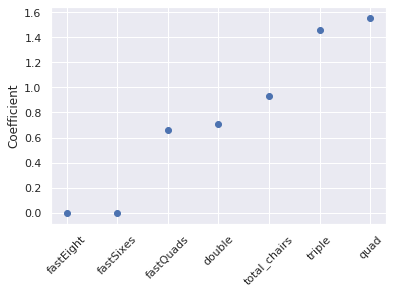

In [28]:
list_of_lift_related_variables = M2_coefficients_df.loc[['total_chairs','fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple','double'],:].sort_values(by='Coefficient', ascending=True)
plt.scatter(list_of_lift_related_variables['Coefficient'].index, list_of_lift_related_variables['Coefficient'])
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [29]:
import pickle
s = pickle.dumps(model2)
from joblib import dump, load
dump(model2, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [30]:
models_performance_df = pd.DataFrame(models_performance, columns = ['Model', 'Explained Variance', 'Mean Absolute Error', 'Features Dropped'])
models_performance_df.set_index('Model')
perf_df = models_performance_df.T
perf_df.columns = ['Values']
perf_df


,Values
Model,Model 2
Explained Variance,0.617386
Mean Absolute Error,7.0027
Features Dropped,"[Name, state]"


In [31]:
M2_coefficients_df.columns = ['Values']
M2_coefficients_df.head()

,Values
summit_elev,2.201206e+00
vertical_drop,3.424301e+00
trams,8.881784e-16
fastEight,0.000000e+00
fastSixes,1.332268e-15


In [32]:
model_data = pd.concat([perf_df, M2_coefficients_df], keys=['Model_Performance', 'Coefficients'])

In [33]:
new_filename = 'data/processed/regression_model_adultweekend_performance.csv'
model_data.to_csv(new_filename)